# Lab 8 
Due 10/27/20 11:59pm CST

The following dataset contains a random sample of data from the 2000 US Census.

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from scipy.stats import norm
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
from scipy.stats import t

## 1. [0.5pt] Read the census.csv dataset into a dataframe called df.

In [2]:
df=pd.read_csv("census.csv")
df

,state_fips_code,age,sex,marital_status,total_personal_income
0,Alabama,73,Female,Divorced,3000
1,Alabama,60,Female,Divorced,11200
2,Alabama,43,Female,Married,15300
3,Alabama,40,Male,Married,47950
4,Arizona,27,Male,Married,14000
...,...,...,...,...,...
334,Wisconsin,63,Male,Divorced,34500
335,Wisconsin,78,Male,Single,38400
336,Wisconsin,31,Male,Married,39510
337,Wisconsin,40,Male,Divorced,49100


## 2. [0.5pt] Print the summary statistics of the numerical variables in the dataset.

In [3]:
df.describe()

,age,total_personal_income
count,339.000000,339.000000
mean,44.138643,33641.404130
std,17.471912,47989.866784
min,16.000000,10.000000
25%,30.000000,10650.000000
50%,41.000000,22700.000000
75%,56.000000,40000.000000
max,93.000000,456000.000000


## 3. [0.5pt] Display the histograms for the total_personal_income and age variables in the data.

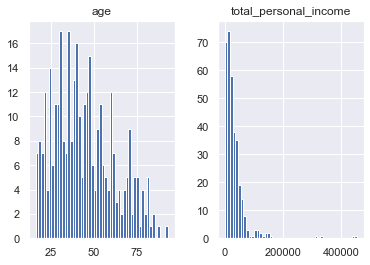

In [4]:
df.hist(bins=50)
plt.show()

## 4. [2pt] Display a scatterplots for the showing the relationship between age and total_personal_income. 
* Color code each point by marital status
* Have the shape (ie. style) of the point indicate the sex of the person.

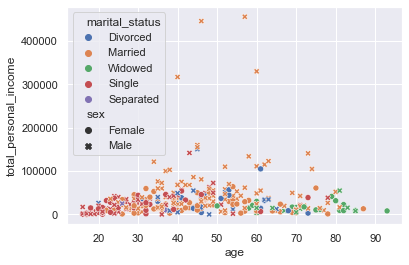

In [5]:
sns.scatterplot(x='age',y='total_personal_income',hue='marital_status',style='sex',data=df)
plt.show()

## 5. [0.5pt] What is the correlation between age and total_personal income.

In [6]:
df.corr()

,age,total_personal_income
age,1.000000,0.109283
total_personal_income,0.109283,1.000000


## 6. [0.5pt] Count the number of levels for the three categorical variables in the dataset.

In [7]:
print("number of levels for marita status: ", df['marital_status'].nunique())

number of levels for marita status:  5


In [8]:
print("number of levels for sex: ", df['sex'].nunique())

number of levels for sex:  2


In [9]:
print("number of levels for state_fips_code: ", df['state_fips_code'].nunique())

number of levels for state_fips_code:  44


## 7. [3pt] Fit a multiple linear regression model with total_personal_income as the response variable and a.) age, b.) marital_status, c.) sex, and d.) the interaction of sex and age as the explanatory variables. Print out the summary of the model.

In [10]:
mod=smf.ols('total_personal_income ~ age + marital_status + sex + sex*age',data=df).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     total_personal_income   R-squared:                       0.118
Model:                               OLS   Adj. R-squared:                  0.099
Method:                    Least Squares   F-statistic:                     6.306
Date:                   Tue, 27 Oct 2020   Prob (F-statistic):           5.82e-07
Time:                           21:34:35   Log-Likelihood:                -4113.3
No. Observations:                    339   AIC:                             8243.
Df Residuals:                        331   BIC:                             8273.
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                    1.316e+04   1.36e+04      0.966      0.335   -1.36e+04       4e+04
marital_status[T.Married ]   8986.5225   8394.200      1.071      0.285   -7526.185    2.55e+04
marital_status[T.Separated] -8367.5842   3.32e+04     -0.252      0.801   -7.38e+04     5.7e+04
marital_status[T.Single]    -6449.3647   9526.561     -0.677      0.499   -2.52e+04    1.23e+04
marital_status[T.Widowed]   -2.022e+04   1.25e+04     -1.621      0.106   -4.48e+04    4315.480
sex[T.Male]                  6156.5126   1.36e+04      0.454      0.650   -2.05e+04    3.28e+04
age                           158.6316    231.993      0.684      0.495    -297.734     614.997
sex[T.Male]:age               367.5405    287.913      1.277      0.203    -198.829     933.910
==============================================================================
Omnibus:                      403.584   Durbin-Watson:                   1.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            24655.348
Skew:                           5.421   Prob(JB):                         0.00
Kurtosis:                      43.348   Cond. No.                         747.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 8. [2 pt] Write out the multiple linear regression model.
* Make sure you put a "hat" over the response variable value to indicate that this equation models what we predict the response variable value will be.
* Put your variables in words (ie. don't write "y" actually write "total_personal_income" in your equation.


$\hat{TotalPersonalIncome}$= 13,160 + 8986.5255 status_married - 8367.5842 status_separated - 6449.3647 status_single - 20220 status_widowed + 6156.5126 sex_male + 158.6316 age + 367.5405 sex_male.age

## 9. [ 2pt] The first observation in the dataset is a 73 year old, divorced female, from Alabama that has a total personal income of $3000. Predict the total personal income of this woman with the model (by hand.)

Since the first observation is a 73 years old, divorced female. Just the slope of age is helpful to calculate the estimated income (other slopes will be zero)

$\hat{TotalPersonalIncome}$= 13,160 + 158.6316 age = 13,160 + 158.6316*73 = 24,740.1068

## 10. [0.5 pt] Calculate the residual for this woman's prediction.

In [11]:
r=3000-24740.1068
print('residual: ',r)

residual:  -21740.1068


## 11. [1 pt] Display the fitted values plot vs. residuals plot for this model

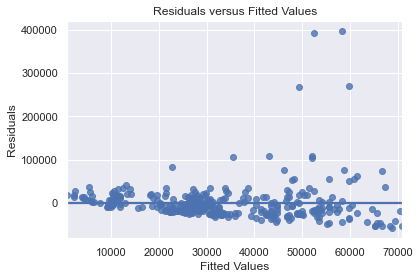

In [12]:
sns.regplot(x=mod.fittedvalues, y=mod.resid, ci=None)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals versus Fitted Values')
plt.show()

## 12 [1pt] Display a histogram of the residuals for this model.

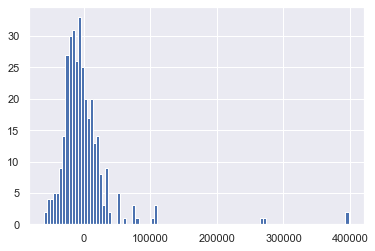

In [13]:
plt.hist(mod.resid, bins=100)
plt.show()

## 13. [1 pt] Does this model meet the linearity condition? Why or why not?

The linearity condition is not really met, it is hard to see the linear relationship in the graph.

## 14[1pt] Does this model meet the constant variance of residuals condition? Why or why not?

The constant variance of residuals condition is not really met, the residuals range increases as the fitted values increase.

## 15 [1pt] Does this model meet the condition in which the residuals are normal with a mean of 0? Why or why not?

The normality of residuals condition is not really met. The distribution of residuals is somewhat normal, but the graph is right-skewed because of the outliers on the right.

## 16 [1pt] Create a new variable in df which is the $log_{10}()$ of the total_personal_income variable. Call this new variable log_total_personal_income.

In [14]:
df['log_total_personal_income']=np.log10(df['total_personal_income'])
df.head()

,state_fips_code,age,sex,marital_status,total_personal_income,log_total_personal_income
0,Alabama,73,Female,Divorced,3000,3.477121
1,Alabama,60,Female,Divorced,11200,4.049218
2,Alabama,43,Female,Married,15300,4.184691
3,Alabama,40,Male,Married,47950,4.680789
4,Arizona,27,Male,Married,14000,4.146128


## 17. [1pt] Refit the model using this log_total_personal_income as your response variable instead. Print out the summary of this model.

In [15]:
log_mod=smf.ols('log_total_personal_income ~ age + marital_status + sex + sex*age',data=df).fit()
log_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     log_total_personal_income   R-squared:                       0.157
Model:                                   OLS   Adj. R-squared:                  0.140
Method:                        Least Squares   F-statistic:                     8.831
Date:                       Tue, 27 Oct 2020   Prob (F-statistic):           5.71e-10
Time:                               21:34:36   Log-Likelihood:                -236.01
No. Observations:                        339   AIC:                             488.0
Df Residuals:                            331   BIC:                             518.6
Df Model:                                  7                                         
Covariance Type:                   nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       4.0286      0.147     27.419      0.000       3.740       4.318
marital_status[T.Married ]      0.1186      0.091      1.310      0.191      -0.060       0.297
marital_status[T.Separated]    -0.0028      0.359     -0.008      0.994      -0.708       0.702
marital_status[T.Single]       -0.1775      0.103     -1.727      0.085      -0.380       0.025
marital_status[T.Widowed]      -0.2136      0.135     -1.588      0.113      -0.478       0.051
sex[T.Male]                     0.0988      0.146      0.676      0.500      -0.189       0.387
age                             0.0029      0.003      1.166      0.245      -0.002       0.008
sex[T.Male]:age                 0.0029      0.003      0.949      0.343      -0.003       0.009
==============================================================================
Omnibus:                      125.064   Durbin-Watson:                   1.385
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              589.235
Skew:                          -1.500   Prob(JB):                    1.12e-128
Kurtosis:                       8.720   Cond. No.                         747.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 18. [2 pt]Recheck the three linear regression conditions for this new model. Did this transformation help the new model better meet these conditions than the old model? Explain.

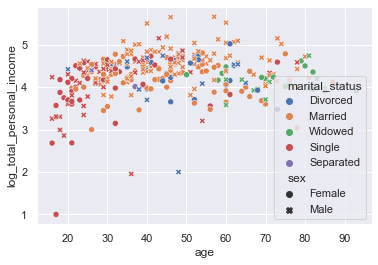

In [16]:
sns.scatterplot(x='age',y='log_total_personal_income',hue='marital_status',style='sex',data=df)
plt.show()

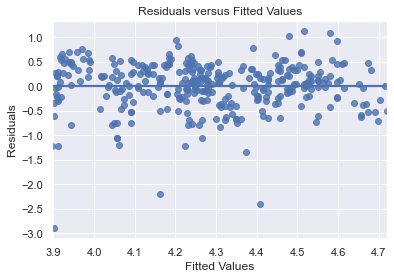

In [17]:
sns.regplot(x=log_mod.fittedvalues, y=log_mod.resid, ci=None)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals versus Fitted Values')
plt.show()

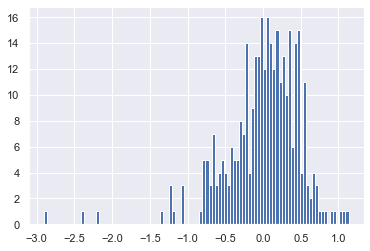

In [18]:
plt.hist(log_mod.resid, bins=100)
plt.show()

The linearity condition is not met. However, the constant variance of residuals condition is more likely to be met with less outliers. The residual distribution is more normal. To conclude, all graphs look better with the log transformation.

## 19 [2 pt] Is there sufficient evidence to suggest that the population slope for the interaction between age and sex is non-zero? Use the t-test and an $\alpha=0.05$  and explain your answer.

In [19]:
log_mod.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,4.0286,0.147,27.419,0.000,3.740,4.318
marital_status[T.Married ],0.1186,0.091,1.310,0.191,-0.060,0.297
marital_status[T.Separated],-0.0028,0.359,-0.008,0.994,-0.708,0.702
marital_status[T.Single],-0.1775,0.103,-1.727,0.085,-0.380,0.025
marital_status[T.Widowed],-0.2136,0.135,-1.588,0.113,-0.478,0.051
sex[T.Male],0.0988,0.146,0.676,0.500,-0.189,0.387
age,0.0029,0.003,1.166,0.245,-0.002,0.008
sex[T.Male]:age,0.0029,0.003,0.949,0.343,-0.003,0.009


The t-test of the interaction between age and sex is 0.949 and p-value is 0.343 > $\alpha$ =0.05. Therefore, we fail to reject the null hypothesis. There is not sufficent evidence to suggest that the population slope for the interaction between age and sex is non-zero.

## 20 [2 pt] Is there sufficient evidence to suggest at least one of the population slopes in this model is non-zero? Use the f-test and an $\alpha=0.05$ and explain your answer.

In [20]:
log_mod.summary().tables[0]

Dep. Variable:,log_total_personal_income,R-squared:,0.157
Model:,OLS,Adj. R-squared:,0.140
Method:,Least Squares,F-statistic:,8.831
Date:,"Tue, 27 Oct 2020",Prob (F-statistic):,5.71e-10
Time:,21:34:37,Log-Likelihood:,-236.01
No. Observations:,339,AIC:,488.0
Df Residuals:,331,BIC:,518.6
Df Model:,7,,
Covariance Type:,nonrobust,,


The f-statistic is 8.831 and p-value is 5.71e-10 < $\alpha$= 0.05. Therefore we reject the null hypothesis. There is sufficient evidence to suggest that atleast one of the population slopes in this model is non-zero